# Cermati Business Analyst Application Assignment

### Preliminary Guideline

The file above contains data for a info commercial (late night commercial) app (-- Imagine those iklan for panci presto or ultra red heater that you see on tv but being streamed on mobile app all day long). Where a user can open the app and look for products demonstration online (just like the late night info commercial on TV). If the user needs help to complete transaction they can see if there is agent available to help. If the is an agent available, they can request the agent to call them to complete transaction.

So, for example, from this data look at row 11, or the hour beginning 4pm (hour 16), September 10th, 2012:
 
During this hour: 
11 people opened the call center app (Eyeballs). 
2 of them did not see any agents (Zeroes), and 
4 of them requested a call (Requests). 
Of the 4 Requests, only 3 complete calls actually resulted (Completed). 
During this time, there were a total of 6 call center agents who logged in (Unique Agents).

### Import Necessary Libraries

In [239]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#### Question 1: Load Dataset

In [240]:
df=pd.read_excel('D:/Data D/Data E/My Data/Modern/My Folder/Kurikulum Pribadi/Resume/CV Application/Cermati/Caller and Agent Data Test.xlsx')

In [241]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Calls,Requests,Unique Agents
0,2012-09-10,7,5,0,2,2,9
1,2012-09-10,8,6,0,2,2,14
2,2012-09-10,9,8,3,0,0,14
3,2012-09-10,10,9,2,0,1,14
4,2012-09-10,11,11,1,4,4,11


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             336 non-null    datetime64[ns]
 1   Time (Local)     336 non-null    int64         
 2   Eyeballs         336 non-null    int64         
 3   Zeroes           336 non-null    int64         
 4   Completed Calls  336 non-null    int64         
 5   Requests         336 non-null    int64         
 6   Unique Agents    336 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 18.5 KB


In [243]:
df.describe()

,Time (Local),Eyeballs,Zeroes,Completed Calls,Requests,Unique Agents
count,336.00000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,11.50000,19.901786,4.252976,4.062500,5.529762,7.895833
std,6.93251,16.902862,5.795391,5.672581,7.399416,5.884296
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.75000,9.000000,1.000000,0.000000,1.000000,3.000000
50%,11.50000,17.000000,3.000000,2.000000,3.000000,8.000000
75%,17.25000,25.000000,5.000000,5.000000,6.250000,11.000000
max,23.00000,99.000000,59.000000,36.000000,46.000000,30.000000


<font color = red> **Answer:** <font color=black> _**A.** I was able to download the data, open the file, and view Row 11!_

#### Question 2: Which date had the most completed call during the two week period?

In [244]:
df_2=df.loc[:,['Date','Completed Calls']]
df_2_group = df_2.groupby('Date').sum()
df_2_group.sort_values(by='Completed Calls', ascending=False)

,Completed Calls
Date,
2012-09-22,248
2012-09-15,199
2012-09-21,190
2012-09-23,111
2012-09-14,108
2012-09-16,93
2012-09-12,91
2012-09-20,70
2012-09-17,57


<font color = red> **Answer:** <font color=black> _**D.** 22 Sept_

#### Question 3: What was the highest number of completed calls within a 24 hour period?

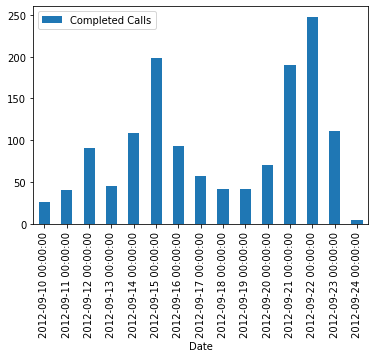

In [245]:
df_3_bar = df_2_group.plot(kind='bar', rot=90)

<font color = red> **Answer:** <font color=black> _**N/A.** (248)_

#### Question 4: Which hour of the day had the most call requests during the two week period?

In [246]:
df_4=df.loc[:,['Time (Local)','Requests ']]
df_4_group = df_4.groupby('Time (Local)').sum()
df_4_group.sort_values(by='Requests ', ascending=False)

,Requests
Time (Local),
23,184
22,174
19,156
0,142
18,119
21,112
20,107
2,100
17,98


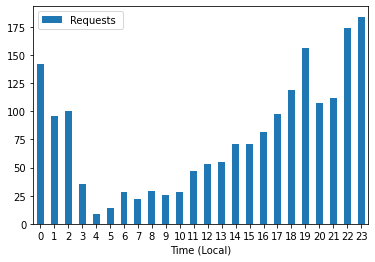

In [247]:
df_4_bar = df_4_group.plot(kind='bar', rot=0)

<font color = red> **Answer:** <font color=black> _**D.** 11pm-12am_

#### Question 5: What percentage of all zeroes during the two week period occurred on weekends (Friday at 5pm to Sunday at 3am)?

In [248]:
df_5 = df.copy()
df_5['Day']=df_5['Date'].dt.day_name()
df_5.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Calls,Requests,Unique Agents,Day
0,2012-09-10,7,5,0,2,2,9,Monday
1,2012-09-10,8,6,0,2,2,14,Monday
2,2012-09-10,9,8,3,0,0,14,Monday
3,2012-09-10,10,9,2,0,1,14,Monday
4,2012-09-10,11,11,1,4,4,11,Monday


In [249]:
friday = (df_5['Day']=='Friday') & (df_5['Time (Local)'].isin(['17','18','19','20','21','22','23']))
saturday = df_5['Day']=='Saturday'
sunday = (df_5['Day']=='Sunday') & (df_5['Time (Local)'].isin(['0','1','2']))
df_5_wn_hr = df_5[friday | saturday | sunday] 
df_5_wn_hr.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Calls,Requests,Unique Agents,Day
106,2012-09-14,17,34,4,3,5,13,Friday
107,2012-09-14,18,40,2,8,9,14,Friday
108,2012-09-14,19,46,6,9,10,15,Friday
109,2012-09-14,20,38,4,8,9,14,Friday
110,2012-09-14,21,49,6,8,9,17,Friday


In [250]:
a = (df_5_wn_hr['Zeroes '].sum())
b = (df['Zeroes '].sum())
persentase = a*100/b
print(str(persentase) + '%')

44.856543037088876%


<font color = red> **Answer:** <font color=black> _**C.** 44.9%_

#### Question 6: In drafting an agent schedule in terms of 8 hour shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests?Assume that an agent will work the same shift each day.


In [251]:
df_6 = df.copy()
df_6=df.loc[:,['Time (Local)','Requests ']]
df_6_group = df_6.groupby('Time (Local)').sum()
df_6_group

,Requests
Time (Local),
0,142
1,96
2,100
3,35
4,9
5,14
6,28
7,22
8,29


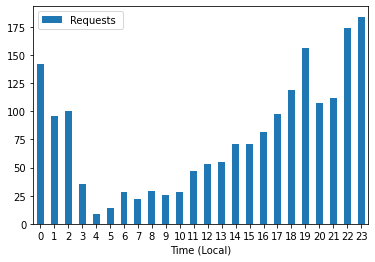

In [252]:
df_6_bar = df_6_group.plot(kind='bar', rot=0)

<font color = red> **Answer:** <font color=black> _**D.** 4pm-12am_

#### Question 7: True or False: Agent supply always increases when demand increases during the two week period/

In [253]:
df_7 = df.copy()
df_7=df.loc[:,['Time (Local)','Requests ','Unique Agents']]
df_7_group = df_7.groupby('Time (Local)').sum()
df_7_group.head()

,Requests,Unique Agents
Time (Local),,
0,142,111
1,96,94
2,100,62
3,35,40
4,9,9


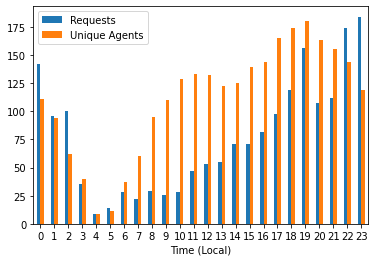

In [254]:
df_7_bar = df_7_group.plot(kind='bar', rot=0)

<font color = red> **Answer:** <font color=black> _**B.** False_

#### Question 8: In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [255]:
#Jawaban A
df_8_a = df.copy()
df_8_a['Date'] = pd.to_datetime(df_8_a['Date'])

start_date1 = '19-09-2012'
start_time1 = 4
end_time1 = 23
a_date1 = df_8_a['Date'] == start_date1
a_time1 = (df_8_a['Time (Local)'] >= start_time1) & (df_8_a['Time (Local)'] <= end_time1)

start_date2 = '20-09-2012'
start_time2 = 0
end_time2 = 23
a_date2 = df_8_a['Date'] == start_date2
a_time2 = (df_8_a['Time (Local)'] >= start_time2) & (df_8['Time (Local)'] <= end_time2)

start_date3 = '21-09-2012'
start_time3 = 0
end_time3 = 23
a_date3 = df_8_a['Date'] == start_date3  
a_time3 = (df_8_a['Time (Local)'] >= start_time3) & (df_8_a['Time (Local)'] <= end_time3)

start_date4 = '22-09-2012'
end_date4 = '22-09-2012'
start_time4 = 0
end_time4 = 4
a_date4 = df_8_a['Date'] == start_date4  
a_time4 = (df_8_a['Time (Local)'] >= start_time4) & (df_8_a['Time (Local)'] <= end_time4)

df_8_a1 = df_8_a.loc[a_date1 & a_time1]
df_8_a2 = df_8_a.loc[a_date2 & a_time2]
df_8_a3 = df_8_a.loc[a_date3 & a_time3]
df_8_a4 = df_8_a.loc[a_date4 & a_time4]
df_8_a_c = [df_8_a1, df_8_a2, df_8_a3, df_8_a4]
df_8_a_r = pd.concat(df_8_a_c)
df_8_a_r

,Date,Time (Local),Eyeballs,Zeroes,Completed Calls,Requests,Unique Agents
213,2012-09-19,4,1,1,0,0,0
214,2012-09-19,5,2,0,0,0,1
215,2012-09-19,6,7,1,2,3,5
216,2012-09-19,7,8,0,2,2,7
217,2012-09-19,8,11,1,2,2,6
...,...,...,...,...,...,...,...
281,2012-09-22,0,62,4,19,27,27
282,2012-09-22,1,39,5,17,24,24
283,2012-09-22,2,30,0,9,18,12
284,2012-09-22,3,11,3,3,3,8


In [256]:
#Hasil Ratio Jawaban A
a_z= df_8_a_r['Zeroes '].sum()
a_e= df_8_a_r['Eyeballs '].sum()
print('Ratio Zeroes to Eyeballs pada 4am 9/19-4am 9/22:' + ' ' +str(a_z/a_e) )

Ratio Zeroes to Eyeballs pada 4am 9/19-4am 9/22: 0.16091954022988506


In [257]:
#Jawaban B
df_8_b = df.copy()
df_8_b['Date'] = pd.to_datetime(df_8_b['Date'])

start_date5 = '20-09-2012'
start_time5 = 11
end_time5 = 23
a_date5 = df_8_b['Date'] == start_date5
a_time5 = (df_8_b['Time (Local)'] >= start_time5) & (df_8_b['Time (Local)'] <= end_time5)

start_date6 = '21-09-2012'
start_time6 = 0
end_time6 = 23
a_date6 = df_8_b['Date'] == start_date6
a_time6 = (df_8_b['Time (Local)'] >= start_time6) & (df_8_b['Time (Local)'] <= end_time6)

start_date7 = '22-09-2012'
start_time7 = 0
end_time7 = 23
a_date7 = df_8_b['Date'] == start_date7  
a_time7 = (df_8_b['Time (Local)'] >= start_time7) & (df_8_b['Time (Local)'] <= end_time7)

start_date8 = '23-09-2012'
end_date8 = '23-09-2012'
start_time8 = 0
end_time8 = 11
a_date4 = df_8_b['Date'] == start_date8  
a_time4 = (df_8_b['Time (Local)'] >= start_time8) & (df_8_b['Time (Local)'] <= end_time8)

df_8_b1 = df_8_b.loc[a_date4 & a_time4]
df_8_b2 = df_8_b.loc[a_date5 & a_time5]
df_8_b3 = df_8_b.loc[a_date6 & a_time6]
df_8_b4 = df_8_b.loc[a_date7 & a_time7]
df_8_b_c = [df_8_b1, df_8_b2, df_8_b3, df_8_b4]
df_8_b_r = pd.concat(df_8_b_c)
df_8_b_r

,Date,Time (Local),Eyeballs,Zeroes,Completed Calls,Requests,Unique Agents
305,2012-09-23,0,62,25,23,32,18
306,2012-09-23,1,38,1,15,23,18
307,2012-09-23,2,34,4,13,18,18
308,2012-09-23,3,19,1,9,9,16
309,2012-09-23,4,1,0,0,1,4
...,...,...,...,...,...,...,...
300,2012-09-22,19,43,10,21,24,15
301,2012-09-22,20,49,4,7,14,18
302,2012-09-22,21,53,3,15,19,21
303,2012-09-22,22,77,11,25,33,19


In [258]:
#Hasil Ratio Jawaban B
b_z= df_8_b_r['Zeroes '].sum()
b_e= df_8_b_r['Eyeballs '].sum()
print('Ratio Zeroes to Eyeballs pada 11am 9/20-11am 9/23:' + ' ' +str(b_z/b_e) )

Ratio Zeroes to Eyeballs pada 11am 9/20-11am 9/23: 0.2014165559982293


In [259]:
#Jawaban C
df_8_c = df.copy()
df_8_c['Date'] = pd.to_datetime(df_8_c['Date'])

start_date8 = '14-09-2012'
start_time8 = 17
end_time8 = 23
a_date8 = df_8_c['Date'] == start_date8
a_time8 = (df_8_c['Time (Local)'] >= start_time8) & (df_8_c['Time (Local)'] <= end_time8)

start_date9 = '15-09-2012'
start_time9 = 0
end_time9 = 23
a_date9 = df_8_c['Date'] == start_date9
a_time9 = (df_8_c['Time (Local)'] >= start_time9) & (df_8_c['Time (Local)'] <= end_time9)

start_date10 = '16-09-2012'
start_time10= 0
end_time10 = 23
a_date10 = df_8_c['Date'] == start_date10  
a_time10 = (df_8_c['Time (Local)'] >= start_time10) & (df_8_c['Time (Local)'] <= end_time10)

start_date11 = '17-09-2012'
end_date11 = '17-09-2012'
start_time11 = 0
end_time11 = 17
a_date11 = df_8_c['Date'] == start_date11  
a_time11 = (df_8_c['Time (Local)'] >= start_time11) & (df_8_c['Time (Local)'] <= end_time11)

df_8_c1 = df_8_c.loc[a_date8 & a_time8]
df_8_c2 = df_8_c.loc[a_date9 & a_time9]
df_8_c3 = df_8_c.loc[a_date10 & a_time10]
df_8_c4 = df_8_c.loc[a_date11 & a_time11]
df_8_c_c = [df_8_c1, df_8_c2, df_8_c3, df_8_c4]
df_8_c_r = pd.concat(df_8_c_c)
df_8_c_r

,Date,Time (Local),Eyeballs,Zeroes,Completed Calls,Requests,Unique Agents
106,2012-09-14,17,34,4,3,5,13
107,2012-09-14,18,40,2,8,9,14
108,2012-09-14,19,46,6,9,10,15
109,2012-09-14,20,38,4,8,9,14
110,2012-09-14,21,49,6,8,9,17
...,...,...,...,...,...,...,...
174,2012-09-17,13,19,3,1,2,8
175,2012-09-17,14,19,3,0,1,8
176,2012-09-17,15,20,3,1,1,8
177,2012-09-17,16,23,7,3,5,7


In [260]:
#Hasil Ratio Jawaban C
c_z= df_8_c_r['Zeroes '].sum()
c_e= df_8_c_r['Eyeballs '].sum()
print('Ratio Zeroes to Eyeballs pada 5pm 9/14-5pm 9/17:' + ' ' +str(c_z/c_e) )

Ratio Zeroes to Eyeballs pada 5pm 9/14-5pm 9/17: 0.2515580736543909


In [261]:
#Jawaban D
df_8_d = df.copy()
df_8_d['Date'] = pd.to_datetime(df_8_d['Date'])

start_date12 = '16-09-2012'
start_time12 = 4
end_time12 = 23
a_date12 = df_8_d['Date'] == start_date12
a_time12 = (df_8_d['Time (Local)'] >= start_time12) & (df_8_d['Time (Local)'] <= end_time12)

start_date13 = '17-09-2012'
start_time13 = 0
end_time13 = 23
a_date13 = df_8_d['Date'] == start_date13
a_time13 = (df_8_d['Time (Local)'] >= start_time13) & (df_8_d['Time (Local)'] <= end_time13)

start_date14 = '18-09-2012'
start_time14= 0
end_time14 = 23
a_date14 = df_8_d['Date'] == start_date14  
a_time14 = (df_8_d['Time (Local)'] >= start_time14) & (df_8_d['Time (Local)'] <= end_time14)

start_date15 = '19-09-2012'
end_date15 = '19-09-2012'
start_time15 = 0
end_time15 = 4
a_date15 = df_8_d['Date'] == start_date15  
a_time15 = (df_8_d['Time (Local)'] >= start_time15) & (df_8_d['Time (Local)'] <= end_time15)

df_8_d1 = df_8_d.loc[a_date12 & a_time12]
df_8_d2 = df_8_d.loc[a_date13 & a_time13]
df_8_d3 = df_8_d.loc[a_date14 & a_time14]
df_8_d4 = df_8_d.loc[a_date15 & a_time15]
df_8_d_c = [df_8_d1, df_8_d2, df_8_d3, df_8_d4]
df_8_d_r = pd.concat(df_8_d_c)
df_8_d_r

,Date,Time (Local),Eyeballs,Zeroes,Completed Calls,Requests,Unique Agents
141,2012-09-16,4,6,6,0,3,2
142,2012-09-16,5,5,5,0,1,1
143,2012-09-16,6,3,3,0,2,0
144,2012-09-16,7,3,0,0,0,1
145,2012-09-16,8,8,2,1,2,3
...,...,...,...,...,...,...,...
209,2012-09-19,0,9,1,0,0,3
210,2012-09-19,1,3,0,0,0,3
211,2012-09-19,2,3,0,2,2,1
212,2012-09-19,3,1,1,0,1,0


In [262]:
#Hasil Ratio Jawaban D
d_z= df_8_d_r['Zeroes '].sum()
d_e= df_8_d_r['Eyeballs '].sum()
print('Ratio Zeroes to Eyeballs pada 4am 9/16-4am 9/19:' + ' ' +str(d_z/d_e) )

Ratio Zeroes to Eyeballs pada 4am 9/16-4am 9/19: 0.24783027965284474


In [263]:
#Rekap Hasil Jawaban
result = {'Option':['A','B','C','D'],
         'Ratio':['0.161','0.201','0.251','0.247']
         }
df_result = pd.DataFrame(result, columns=['Option','Ratio'])
df_result

,Option,Ratio
0,A,0.161
1,B,0.201
2,C,0.251
3,D,0.247


<font color = red> **Answer:** <font color=black> _**C.** 5pm 9/14-5pm 9/17_

#### Question 9: If you could add 5 agents to any single hour every day during the two week period, which hour should you add them to?

In [264]:
df_9=df.copy()
df_9=df.loc[:,['Time (Local)','Eyeballs ','Requests ','Unique Agents']]
df_9_group = df_9.groupby('Time (Local)').sum()
df_9_group['Gap']=df_9_group['Unique Agents'] - df_9_group['Requests ']
df_9_group.sort_values(by='Gap', ascending=True)

,Eyeballs,Requests,Unique Agents,Gap
Time (Local),,,,
23,488,184,119,-65
2,170,100,62,-38
0,339,142,111,-31
22,492,174,144,-30
5,42,14,11,-3
1,207,96,94,-2
4,29,9,9,0
3,83,35,40,5
6,78,28,37,9


<font color = red> **Answer:** <font color=black> _**D.** 11pm-12am_

#### Question 10: Looking at the data from all two weeks, which time might make the most sense to consider a true "end of day" instead of midnight? (i.e., when are supply and demand both at natural minimums)

In [265]:
df_10 = df.copy()
df_10=df.loc[:,['Time (Local)','Requests ','Unique Agents']]
df_10_group = df_10.groupby('Time (Local)').sum()
df_10_group.sort_values(by='Requests ', ascending=True)

,Requests,Unique Agents
Time (Local),,
4,9,9
5,14,11
7,22,60
9,26,110
10,28,129
6,28,37
8,29,95
3,35,40
11,47,133


<font color = red> **Answer:** <font color=black> _**C.** 4 am_